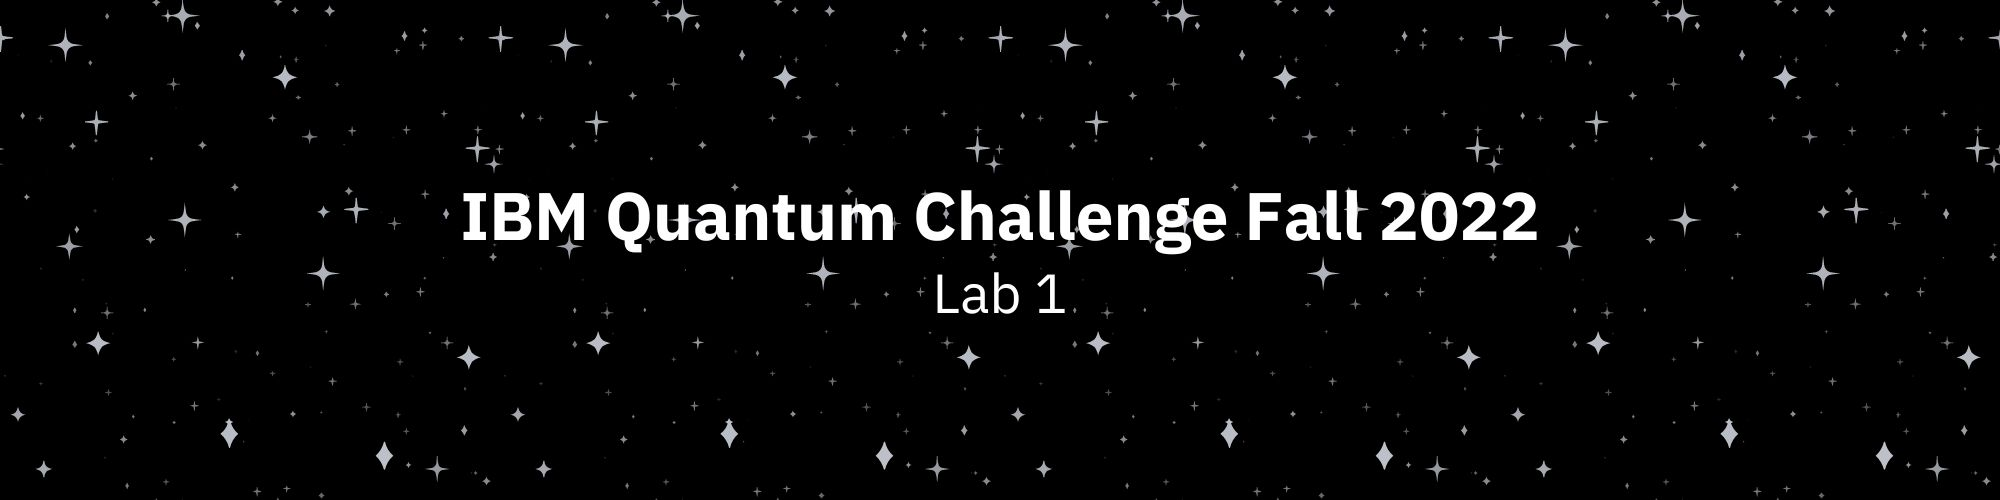

# Qiskit RuntimeにおけるPrimitives入門

# 目次
- **[ストーリー](#ストーリー)**
- **[Part I: Primitives入門](#Part-I:-Primitives入門)**
- **[Part II: Qiskit Runtimeを使い始める](#Part-II:-Qiskit-Runtimeを使い始める)**
- **[Part III: Primitivesの使い方](#Part-III:-Primitivesの使い方)**
    - **[Exercise 1: ベルンシュタイン・ヴァジラニ関数を作る](#exercise1)**
    - **[Exercise 2: `Sampler`を使ったパラメーター化された回路へのパラメーターのバインド](#exercise2)**
    - **[Exercise 3: ハミルトニアンの期待値を計算するEstimatorルーチンを作る](#exercise3)**
- **[Part IV: エラー緩和の始まり](#Part-IV:-エラー緩和の始まり)**
    - **[Exercise 4: エラー緩和について正しい説明を選ぶ](#exercise4)**
- **[Part V: 2つのPrimitivesの例](#Part-V:-2つのPrimitivesの例---メッセージを解読する！)**
    - **[Exercise 5: エラー緩和を適用する](#exercise5)**
    - **[Exercise 6: メッセージの確認](#exercise6)**

# ストーリー

## オープニング・ストーリー - プロローグ

こちらにあるオープニング・ビデオをご覧ください: **[Fall Challenge Opening Story](https://youtu.be/_jJIgsh1KOg)**

<details><summary><b>**クリックするとビデオの字幕を読むことができます**</b></summary>
<p>

あなたは、地球初の超光速宇宙船の船長として、人類を宇宙探査の時代へと導いています。

その旅では、魅力的な異世界や、夢にも思わなかった宇宙現象など、素晴らしいものを発見します。

根っからの研究者として探究心旺盛なあなたは、旅の途中で出会ったものすべてを調査します。

ある日、あなたはブラックホールを発見しました。理論的な研究を超えて、本物のブラックホールを直接研究するチャンスに心躍るあなたとクルー。
    
計算上、ブラックホールから安全な距離と思われる場所に宇宙船を停泊させる。しかし、どうやら計算を間違えたようだ。

そして、ブラックホールの引力はあまりにも強い。

少しずつ、ゆっくりと、しかし着実に、ブラックホールの中心へと引き寄せられていく...。
    </p>
</details>

## 第１章
 
黄色信号が発信されました。騒ぎが起きます。あなたとクルーはブラックホールの引力から逃れるために無数の方法を試しながら奔走します。しかし、その努力もむなしく、燃料を大量に消費してしまいます。

技術的にはまだ安全であり、ブラックホールの周りを緩やかな軌道で漂っているだけですが、非常にゆっくりと近づいていっています。あなたの計算によると、完全に落下するか、または重力の影響で宇宙船がバラバラになるかまでには数日かかる見込みです。

しかし、どうやって脱出すればよいだろうか？

いろいろ考えた末に、あなたがまだ試していない方法をチーフ・サイエンス・オフィサーが思いつきました：重力アシスト操縦です。ブラックホールを周回する惑星のひとつをスイングバイして、ブラックホールの影響から逃れるというものです。

うまくいくかもしれない。

その作戦に適した惑星を探す司令を出す直前に、通信機がスクランブルされたメッセージを受信しました。不思議なことに、そのメッセージは地球で使われているものと同じです。そんなはずはない！あなたたちは地球から初めて宇宙に来たのですから。

そして、数百キロメートル離れたところにあるビーコンの発信源を突き止めました。

すると、なんとそれは、あなたの宇宙船が搭載しているビーコンと同じ型のものだったのです。そんなことがあり得るのか？

それは、まるで時の流れに揉まれたように、あなたの船のものよりボロボロに磨り減っているように見えます。あなたは船内にあるすべてのビーコンをチェックし、それらがすべて無傷であることを発見しました。

あなたはこのビーコンとそのメッセージが重要であると感じ、このメッセージの解読に全力を注ぎます。

解読のためのプロトコルは、メッセージ・ヘッダーのスクランブル解除と、そのシーケンスを通信デコーダに入力することです。スクランブル解除ルーチンを構築し、デコード・シーケンス構築ルーチンを起動するために、以下のExerciseを完了しましょう!

# Part I: Primitives入門

Primitivesは、量子計算を行うユーザー、量子アルゴリズムを実装する開発者、複雑な問題を解決し新しいアプリケーションを提供する研究者のための、基礎的、基本的な構成要素として機能することを意図しています。

しかし、量子計算の観点からその意味を考える前に、「Primitive(プリミティブ)」という言葉が実際に何を意味するのか、それが私たちに何を意味するのかを考えてみよう。

**生物学者**に「原始的要素とは何か」と尋ねると、おそらく次のような答えが返ってくるでしょう：「共通の祖先から受け継いだ性質、特性、特徴」。**数学者**であれば、「有限体において、その場の乗法的要素群の生成元となる要素」と答えるかもしれません。**CADモデルの設計者**なら、「複雑な幾何学的形状を構築するために使用できる、システム上で最も単純な形状」と説明するかもしれません。

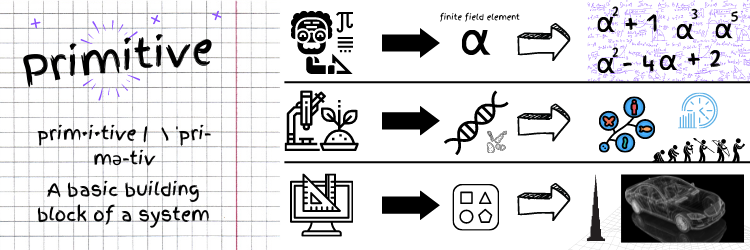

これらから、分かることは何でしょうか？これらの定義には、1つの共通点があります。それは、プリミティブとは、より複雑な要素の構成要素となる**基本的な要素**であると定義していることです。

さて、一般的なコンピューティングに関して、「プリミティブ」という言葉を使うとどういう意味になるでしょうか。ここでは、言語プリミティブについて見ていきましょう。言語プリミティブとは、あるプログラミング言語で利用できる最も単純な不可分の要素と定義することができます。コンピューターの中のものはすべて0と1で記憶されているだけだと聞いたことがあると思いますが、全くその通りです。しかし、2進数をプログラミング言語の原始的な構成要素とすると、本当に大変なことになります。ここでは、高レベルのプログラミング言語に関連するプリミティブという言葉を定義して、プログラムを完全には分類できないですが、理解しやすいものに分類してみましょう。

その良い例がプリミティブ・データ型です。
選択した言語によっては、一般に分割できないデータ型があり、その使い方次第で、より複雑なデータ型を構築することができます。
例えば：一般にPythonでは、`int`、`float`、`string`、`boolean`はプリミティブ・データ型であり、また、**string(文字列)の配列** 、**名前のリスト** 、**10進座標系のタプル**、**integer(整数)の集合**は、プリミティブ・データ型によって構築されたプリミティブではないデータ型として考えられています。

では、プログラミングにおいて一般的な関数に関しても同じように定義できるのでしょうか？ プリミティブ関数は、使い方次第でより複雑で高度なプログラム要素やインタフェースを構築できる基本的なインタフェースやコードセグメントとして定義することができます。

## なるほど、それが量子とどのような関係があるのですか？

言語プリミティブの定義で説明したように、技術的には2進数やマシンコードがプログラムをコンパイルする際の核となるプリミティブ構成要素であることはわかっていますが、マシンコードレベルではなく、よりアクセスしやすくプログラムを構築できるように分類した上位のプリミティブ用語を定義しているのです。
ほとんどの場合、主要なコンパイル言語には効率的なコンパイラー・ルーチンが組み込まれており、それを考えると、所有するシステムに最適化された実行ワークフローを期待しているので、プログラミング言語が定義する文法とプリミティブでコードを構築することができます。

**では、量子についての質問です：量子計算のルーチンやワークフローに同様の構造を定義する方法はあるのでしょうか？**

## Qiskit Runtime Primitives入門:

![Qiskit Runtime architecture](https://cloud.ibm.com/docs-content/v1/content/fe08b8e3a114015612ab3ed112afa281d6ce896a/quantum-computing/images/Qiskit_Runtime_architecture.png)


クラウド上のQPUを中心とした所定の　_量子ワークフロー_　を最大化するために、スケールでの効率的な実行でワークロードを最適化するために構築されたサービスに準拠したコンピューティング・プログラミングモデルを持つようになったのです。昨年から、Qiskitのランタイムサービスは、コンテナ型実行のコンセプトに基づいて構築されています。これは、複数の計算要素をパッケージ化して、あらゆるシステム上でポータブルに実行できるようにした実行モデルです。単体の回路をクラウドに送るのではなく、プログラム全体を依存関係とともにパッケージ化してクラウド上で実行することで、レイテンシーを節約し、反復ループのオーバーヘッドを低減します。

Qiskit Runtimeサービスの新しい開発により、Runtimeサービスだけでなく、Qiskit Runtimeサービスへのインターフェースとして機能する新しいプログラミングモデルを導入し、スケールの大きいプログラミング体験にフォーカスして更新されたものが **Qiskit Primitives** です。

## Qiskit Runtime Primitives: SamplerとEstimator入門

量子計算のためのPrimitivesを定義するために、まず、2つの候補を用意しました。量子計算の基本的な構成要素は複数存在するため、今後、さらに追加していく予定です。ここでは、2つの基本的なPrimitivesを定義しましょう。

量子コンピューターが古典コンピューターと異なる点は、出力に非古典的な確率分布を生成できることで、この点が重要です。そのため、同じ回路を複数回実行することで、確率分布の形で有用な情報を得ることができます。確率分布は、そこからサンプリングしたり、量を推定したりすることができるものです。

この2つの情報、**a)確率分布のサンプリング**、**b)量の推定**、に基づき、私たちは2つのPrimitivesを命名しました：**Sampler**と**Estimator**です。


### Sampler

Samplerは、その名の通り、量子回路の出力からサンプリングして、擬似的な確率分布を推定します。出力からサンプリングすることで、量子回路の準確率分布全体を推定することができます。この機能は、回路設計の際に、回路全体の分布データを調べたり、作業する必要がある場合に、特に有効な機能です。つまり、ユーザーからの回路を入力とし、準確率のエラー軽減された読み出しを生成するプログラムです。このプログラムにより、ユーザーはエラー緩和を用いたショット結果をより適切に評価することができ、破壊的干渉の文脈で複数の関連するデータポイントの可能性をより効率的に評価することができるようになります。

これは要するに、回路を実行させたときに得られるおなじみの「counts」の出力と非常によく似ていますが、Samplerは、エラー緩和ルーチンの結果として準確率分布の出力を得ることができます。

簡単に言えば、より広い範囲の情報データを自由に使えるようになるのです。準確率分布の表現から得られる情報は，真の確率分布の尤度を調べたり，サンプリングのオーバーヘッドと引き換えに不偏の期待値ポイントを計算したりするのに，より関連性があると思われます。これらの分布はある意味で真の確率論と同じように振る舞いますが、異なるのは、元の理論の制約がいくつか緩和されていることです。その1つが、「負の」確率を表す負のデータポイントが存在する可能性です（ただし、集合的に和が1になることはあります）。また、このデータから、使用状況に基づいて真の確率分布を推定することもできます。例：グローバー探索、QSVMルーチン、スタビライザー計算、最適化ルーチンなど。

Smaplerは出力全体に対する完全な分布を与えますが、特定の結果に興味がある場合もあるでしょう。そこで、**Estimator** を見てみましょう！

### Estimator

Estimatorは、基本的に注目する演算子の期待値を計算し、受け取るものです。回路と観測値を取り込み、回路と観測値間を選択的にグルーピングして実行し、与えられたパラメータ入力に対する期待値と分散を効率的に評価するプログラム・インターフェースです。このPrimitiveにより、多くのアルゴリズムで必要とされる量子演算子の期待値の計算と解釈を効率的に行うことができます。

ある問題に対して最終的な解を求めることに興味があり、カウントの完全な分布を調べる必要がない人は、Estimator primitiveの方が便利だと感じるでしょう。このルーチンは、基本的にほとんどの近い将来の量子アルゴリズムに役立つもので、最も一般的な例は変分クラスのアルゴリズムです。Estimatorは回路だけでなく、量子観測量の期待値を計算するため、回路と観測量の入力が必要です。このような観測量には、分子の電子構造、最適化問題のコスト関数など、実に様々なものが含まれています。

## Qiskit Runtimeを使うべき理由


では、なぜこの新しいプログラミングパラダイムにこだわるのでしょうか？答えは Qiskit Runtimeサービスとのインターフェースと、その上に構築された強力なサービスやフレームワークを活用するためです。

前の章では、最適化されたワークフローを実現するためにコンパイラーに依存しながら、より高度な開発を可能にする言語プリミティブを定義しましたが、Runtimeは以下のような一般的に効果を期待される分野での効果が期待されます：

- **効率** : 
バックエンド用に設計された反復処理ワークロードのための高度に最適化されたルーチンとオプションによって効率化されます。
- **レイテンシー** : 
Sessionsフレームワークを使用したスケジューリング、ジョブの優先順位付け、共有キャッシュにより、投入されたルーチンのレイテンシーを低減し、結果を迅速に提供します。
- **一貫性** : 
既存のプリミティブモデルを補完する新しい機能を追加し、サービス全体の複雑なルーチンの上に構築する一貫したプログラミングモデルです。
- **カスタマイズ性** : 
コンテキストとジョブのパラメーターに基づいて回路をカスタマイズし、反復ルーチンをマネージします。
- **エラーの軽減と抑制** : 
情報の質を高めるために、シンプルな抽象化されたインターフェースでエラー軽減・抑制のための最先端の研究成果を取り入れます。

最後に、低レイテンシーである(待ち時間が少ない)ことです。使われる環境はすでにすべてのQiskitにおける必要な要素を持ち、量子ハードウェアの近くで動作するため、古典ハードウェアと量子ハードウェア間のフィードバックループを必要とするアルゴリズムでは、大幅なスピードアップが期待できるのです。Qiskit Runtimeサービスでは、説明したようなPrimitiveプログラミングモデルを使って、これらの利点をすぐに活用することができます。さっそく試してみましょう！このノートブックでは、SessionsフレームワークでSamplerとEstimator primitivesを使用する基本的な方法と、現在利用可能なエラー緩和の手法を紹介します。この後のノートブックでは、機械学習、最適化、化学の分野で、このprimitive プログラミングモデルを使って、より一般的なアルゴリズムルーチンを構築する方法を紹介していきます。

では、Qiskit runtime サービスを使って、この新しいコンピューティングパラダイムでプログラムを構築する方法を確認しましょう。

###  ライブラリーの導入

In [2]:
import time
import numpy as np
from qiskit import *
from qiskit.circuit import Parameter
from qiskit.quantum_info import Statevector, Pauli, SparsePauliOp
from qiskit.circuit.library import RealAmplitudes
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from qiskit.tools.visualization import plot_histogram
# %config InlineBackend.figure_format='retina'

# Part II: Qiskit Runtimeを使い始める

Qiskit Runtimeを使い始めることにします。Qiskit Runtimeは、あなたが使っているIBM Quantum ChallengeのIBM Quantum Labインスタンスにすでにインストールされ、セットアップされています。

ローカルシステムで実行している場合、Qiskit Runtime パッケージをインストールする必要があるかもしれません：`pip install qiskit-ibm-runtime` でインストールできます。IBM Quantum ChallengeポータルからIBM Quantum Labに移動したのであれば、すでにすべてがセットアップされているはずです。

ここではまず`QiskitRuntimeService`を定義してQiskit Runtimeのすべての要素を使用できるようにし、現在利用できる2つのprimitiveである、`Sampler`と`Estimator`を必要に応じて呼び出すことができるようにします。

In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Options, Sampler, Estimator

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


以下のブロックは、現在の環境に対する Runtime アカウントの認証情報を保存します。`channel` キーワードの引数で、通常の IBM Quantum (`channel='ibm_quantum'`)  と IBM Cloud (`channel='ibm_cloud'`)のどちらを使用しているのかを Runtime に知らせます。今回は、channelに`ibm_quantum`を使用します。ここでは、すべての実行に `ibm_quantum` チャンネルを使用することにします。このセルは一度だけ実行することができ、認証情報はその環境用に保存されているはずです。また、キーワード引数 `token` については、あなたのAPI トークンの値がこのリンクに記載されています：[**quantum-computing.ibm.com/account**](https://quantum-computing.ibm.com/account).

IBM Quantum Lab を利用している場合、以降の実行ではchannelだけを指定して `QiskitRuntimeService` を呼び出すだけでよいです。

In [78]:
# Save the Runtime account credentials if you have not done so already
# If you need to overwrite the account info, please add `overwrite=True`
# QiskitRuntimeService.save_account(channel='ibm_quantum', token='my_token', overwrite=True)

In [4]:
service = QiskitRuntimeService(channel='ibm_quantum')

これでサービスのセットアップが完了し、サービスは自動的にアクセス可能なすべてのバックエンドにアクセスできるようになりました。以下のコマンドを実行して、利用可能なバックエンドをすべて表示してみましょう。

In [5]:
service.backends()

[<IBMBackend('ibmq_manila')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibm_oslo')>,
 <IBMBackend('ibmq_lima')>,
 <IBMBackend('ibmq_belem')>,
 <IBMBackend('ibmq_quito')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_stabilizer')>]

# Part III: Primitivesの使い方


それでは、Primitivesを使ったビルドの勘どころを、少しずつ押さえていきましょう。まず、最初のPrimitivesはSampler primitiveです。先にSessionの概念について少し触れておきます：

クラウド上でPrimitivesを使用するには、Sessionを安全にオープン/クローズするために、コンテキスト・マネージャーを使用する必要があります。これは、コンストラクターが関連するパラメーターを取り込み、SamplerとEstimatorのメソッドがキュー内のジョブを渡す`Session`キーワードを使用することで実現されます。`Options` は、現在のsessionとそのパラメーターを設定し、その実行環境を制御するために使用します。このフォーマットでは、複数の様々なprimitiveなプログラムを1つのパッケージとして実行することができます。これにより、1つのsessionで定義されたSamperやEstimatorの呼び出しを1つのインスタンスで渡すことが容易になります。また、ジョブパイプラインでsessionルーチン全体をブロックにし、sessionコンストラクターで定義されたprimitiveコールをジョブ・キューで順次実行させることができます。

Primitivesの使い方を学ぶために、ベルンシュタイン・ヴァジラニ アルゴリズムを使ってデモを行います。

# 3.1 Samplerを使った例

### ベルンシュタイン・ヴァジラニ アルゴリズム

このアルゴリズムは、量子コンピューターを複雑な問題に適用した場合に優位性があることを示した特殊な量子アルゴリズムのうちの一つです。

入力と隠れたビット文字列$s$のビット積を返す関数があり，その長さは$n$です。

$$ f(x) = s ⋅ x (\mathrm{mod} 2) $$

隠れたビット文字列を見つけるには、関数 $f$ を $n$ 回呼び出す必要があります。しかし、量子コンピューターを使用すると、関数を **1 回呼び出すだけ** で100%の信頼度でこの問題を解くことができます。隠れたビット文字列を見つけるための量子ベルンシュタイン・ヴァジラニアルゴリズムは非常にシンプルです。

1. 入力量子ビットを状態 $|0\rangle^{\otimes n}$ に初期化し、出力量子ビットを $|-\rangle$ に初期化する。
2. アダマールゲートを入力レジスターに適用する。
3. オラクルに問い合わせる。
4. アダマールゲートを入力レジスターに適用する。
5. 測定する。

ベルンシュタイン・ヴァジラニ アルゴリズムについてのより詳細な情報については、Qiskitテキストブックのこの章を参考にしてください: **https://ja.learn.qiskit.org/course/ch-algorithms/bernstein-vazirani-algorithm**　または、Qiskit YoutubeにあるCoding with Qiskit Season 1のエピソード6を参照することもできます：[**Bernstein-Vazirani Algorithm**](https://youtu.be/sqJIpHYl7oo)


以下に、ベルンシュタイン・ヴァジラニ アルゴリズムが隠れたビット文字列 "001" を見つける例を示します。

In [30]:
hidden = "001"
print(len(hidden))

3


この隠れたビット文字列には、3つの入力量子ビットと1つの出力量子ビットが必要です。

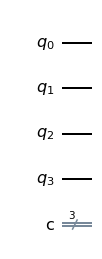

In [31]:
# Make a quantum circuit
qc = QuantumCircuit(4, 3)
display(qc.draw(output="mpl"))

ステップ 1. 入力量子ビットを状態 $|0\rangle^{\otimes n}$ に初期化し、出力量子ビットを $|-\rangle$ に初期化します。

最初に、すべての量子ビットは $|0\rangle$ として初期化されるため、入力量子ビットにゲートを適用する必要はありません。 ただし、出力量子ビットの状態は $|-\rangle$ として変更する必要があります。 そのために、X-gate を適用してから H-gate (アダマールゲート) を適用します。

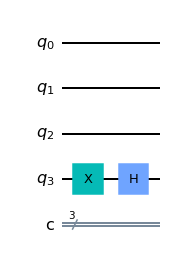

In [32]:
qc.x(3)
qc.h(3)
display(qc.draw(output="mpl"))

ステップ 2. アダマールゲートを入力レジスターに適用します。

各入力量子ビットにアダマールゲートを適用します。

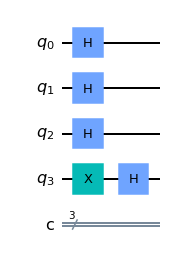

In [33]:
qc.h(0)
qc.h(1)
qc.h(2)
display(qc.draw(output="mpl"))

ステップ 3.オラクルに問い合わせます。

CNOTゲートを使用してオラクルにクエリーを実行します。隠し回路が"001"であるため、CNOTゲートを量子ビット0と出力ゲートに適用します。注意：Qiskitでは、ビットの番号が **右から左へ** 割り当てられます。

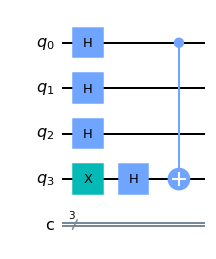

In [34]:
qc.cnot(0,3)
display(qc.draw(output="mpl"))

ステップ 4. アダマールゲートを入力レジスターに適用します。

各入力量子ビットにアダマールゲートを再度適用します。

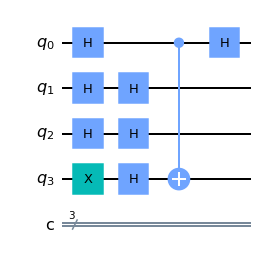

In [35]:
qc.h(0)
qc.h(1)
qc.h(2)
display(qc.draw(output="mpl"))

ステップ 5. 測定します。

[`measure`](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.measure.html) メソッドですべての入力量子ビットを測定します。

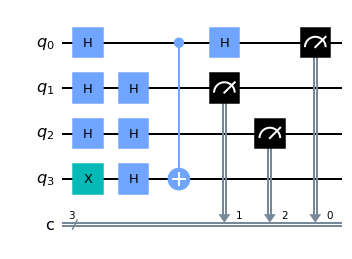

In [36]:
qc.measure(range(3), range(3))
display(qc.draw(output="mpl"))

回路はシミュレーターで実行できます。下のセルを実行すると、結果を確認できます。

In [37]:
# Use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
results = aer_sim.run(qc).result()
answer = results.get_counts()

print(answer)

{'001': 1024}


結果には、最初に設定した隠れたビット文字列"001"が表示されています。

<a id="exercise1"></a>
<div class="alert alert-block alert-success">
    
<b> Exercise 1:</b> 
    

    
ベルンシュタイン・ヴァジラニ関数を作ってみましょう。パラメーターは1つだけで、これが隠しビット文字列です。この隠しビット文字列は "0 "と "1 "から成り立っています。以下のコードブロックでは、全ての隠しビット文字列でうまく動作する一般的な関数を構築して、graderに渡す必要があります。
    
</div>

In [38]:
def bernstein_vazirani(string):
    
    # Save the length of string
    string_length = len(string)
    
    # Make a quantum circuit
    qc = QuantumCircuit(string_length+1, string_length)
    
    # Initialize each input qubit to apply a Hadamard gate and output qubit to |->
    for i in range(string_length):
        qc.h(i)
    qc.x(string_length)
    qc.h(string_length)
    qc.barrier()
    
    # Apply an oracle for the given string
    # Note: In Qiskit, numbers are assigned to the bits in a string from right to left
    rev_string = string[::-1]
    for i in range(string_length):
        if rev_string[i] == "1":
            qc.cx(i, string_length)
    qc.barrier()
        
    # Apply Hadamard gates after querying the oracle
    for i in range(string_length):
        qc.h(i)
    
    # Measurement
    qc.measure(range(string_length), range(string_length))
    
    return qc

In [39]:
# Submit your answer using following code
from qc_grader.challenges.fall_2022 import grade_lab1_ex1

grade_lab1_ex1(bernstein_vazirani) # Expected result type: function

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


ここで、上記の関数を呼び出して、定義されているベルンシュタイン・ヴァジラニ回路を構築します。

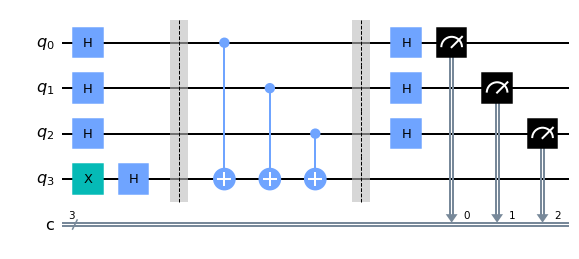

In [40]:
qc1 = bernstein_vazirani('111')
display(qc1.draw(output="mpl"))

この回路を実行する前に、先ほど述べたように、1つのSamplerセッションに対して複数の回路呼び出しと実行が可能です。そのことを示すために、もう1つベルンシュタイン・ヴァジラニ回路を作ることにします。

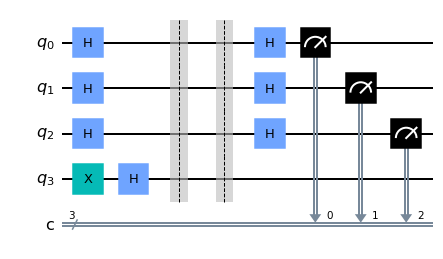

In [41]:
qc2 = bernstein_vazirani('000')
display(qc2.draw(output="mpl"))

### 回路実行のためにRuntimeを使う

Qiskit Runtimeで量子回路を実行する前に、3つのステップがあることを忘れないでください。

1. 使用するBackendを設定します。
2. `Session`を設定します。
3. sessionの中でPrimitivesについての`Sampler` または `Estimator`のインスタンスを作ります。

まず、使用するバックエンドを設定しましょう。ここでは、クラウド上の`ibmq_qasm_simulator`上でルーチンを実行することにします。

In [42]:
backend = service.backends(simulator=True)[0]
print(backend)

<IBMBackend('ibmq_qasm_simulator')>


ここでセッションをコンストラクターを作成してみましょう。`with`文を使って`Session`を作り、その中にベルンシュタイン・ヴァジラニ回路を実行するための`Sampler`インスタンスを作成します。ここでの`with`文はコンテキスト・マネージャーを意味し、コンストラクターの初期パラメーターとして定義したサービスを渡すために使用します。Samplerでジョブを投入するには、`run` メソッドでパラメータを指定します。このメソッドには `circuits` を渡す必要があり、1つのcircuitか `QuantumCircuit` のリストを渡すことができます。このコンストラクターの最大の特徴は、`Sampler` の runコールに渡されるリストを変更するだけで、渡すcircuit数を素早く拡張できることです。

In [43]:
options = Options(simulator={"seed_simulator": 42}) # Do not change values in simulator

同じ結果を得るために、`Sampler` にseedを設定します。seedは、上記の `options` を使用して `Sampler` オブジェクトの内部で設定することができる。optionsと `Sampler` の使い方の例は、以下の通りです。

In [44]:
with Session(service=service, backend=backend):
    sampler = Sampler(options=options)
    job = sampler.run(circuits=[qc1,qc2])

サンプラーを実行すると、`RuntimeJob` オブジェクトが返されます。このオブジェクトから `result` メソッドを使って結果を抽出し、返されたデータを確認します。そして、この返された結果から、興味のあるデータを個別に選択することができます。詳細はこちらです: **[RuntimeJob](https://qiskit.org/documentation/partners/qiskit_ibm_runtime/stubs/qiskit_ibm_runtime.RuntimeJob.html#qiskit_ibm_runtime.RuntimeJob)**

In [45]:
result = job.result()

In [46]:
result

SamplerResult(quasi_dists=[{7: 1.0}, {0: 1.0}], metadata=[{'header_metadata': {}, 'shots': 4000, 'readout_mitigation_overhead': 1.0, 'readout_mitigation_time': 0.05582360200060066}, {'header_metadata': {}, 'shots': 4000, 'readout_mitigation_overhead': 1.0, 'readout_mitigation_time': 0.02716558899555821}])

In [47]:
result.quasi_dists

[{7: 1.0}, {0: 1.0}]

この結果、各回路から2つの結果が得られます。最初の回路`qc1`の隠れ文字列は`111`であり、最初の結果は7（7は2進数で111）です。この確率は1.0であり、この回路は100%確実に7を返すということです。同様に、2番目の結果は0（0は2進数で000）であり、その確率も1.0です。

このように、回路を作るときに渡したビット列と同じ結果になります。どうしてこんなことが可能なのか、不思議に思われるかもしれません。下の画像を見てください：

![](https://qiskit.org/textbook/ch-gates/images/identities_1.svg)

4つのHゲートの間にCNOTゲートがあり、これは反転したCNOTゲートと同じす。これはキックバック（または位相キックバック）の例で、ゲートによってある量子ビットに加えられた固有値が、制御演算によって別の量子ビットに*キックバック*されるのです。これにより、ベルンシュタイン・ヴァジラニ回路は、隠されたビット列を明らかにすることができます。

### パラメーター化された回路

Primitivesのメリットの1つは、パラメーター化された回路に複数のパラメーターをバインドするのが簡単になることです。回路にパラメーターをバインドする方法の例については、 **[Qiskitのドキュメントにあるセクションにリンクしているこのチュートリアル](https://qiskit.org/documentation/locale/ja_JP/tutorials/circuits_advanced/01_advanced_circuits.html#%E3%83%91%E3%83%A9%E3%83%A1%E3%83%BC%E3%82%BF%E5%8C%96%E3%81%95%E3%82%8C%E3%81%9F%E5%9B%9E%E8%B7%AF)** をご覧ください。制御Pゲート（制御位相ゲート）を使ったキックバックの別の例を紹介しましょう。ここでは、**[Pゲート](https://qiskit.org/documentation/stubs/qiskit.circuit.library.PhaseGate.html)** を回転パラメーター`theta`でパラメター化します。

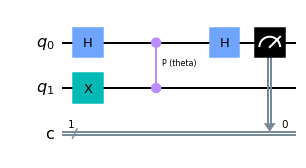

In [48]:
theta = Parameter('theta')

qc = QuantumCircuit(2,1)
qc.x(1)
qc.h(0)
qc.cp(theta,0,1)
qc.h(0)
qc.measure(0,0)

qc.draw("mpl")

上記の回路はパラメーター化されており、固有値は測定のために量子ビット 0 に戻されます。 キックバックの量は、パラメーター theta によって決まります。 下のセルで、上記の回路のパラメーターをリストとして定義します。ここでのパラメーターは、$0$ から $2\pi$ までを50等間隔のポイントで分割したものになります。

位相制御ゲートについて、異なる位相で回路を評価してみましょう：

In [49]:
phases = np.linspace(0, 2*np.pi, 50) # Specify the range of parameters to look within 0 to 2pi with 50 different phases

# Phases need to be expressed as list of lists in order to work
individual_phases = [[ph] for ph in phases]

上記の回路に適用する前に、ブロッホ球を使ってどのように見えるかをイメージしてみましょう。

In [50]:
# help understanding of how its phase is moving
from qiskit.visualization import plot_bloch_multivector

states = []

for i in range(0, 50, 10):
    
    temp = QuantumCircuit(2,1)
    temp.x(1)
    temp.h(0)
    temp.cp(individual_phases[i][0],0,1)
    temp.h(0)
    
    state = Statevector(temp)
    states.append(state)

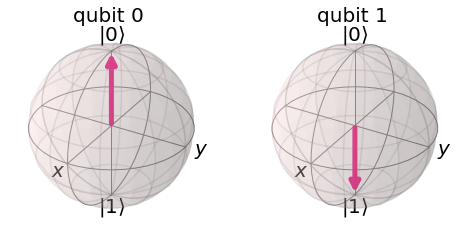

In [51]:
plot_bloch_multivector(states[0])

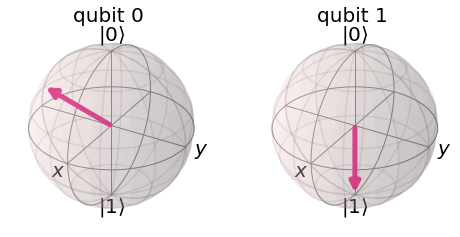

In [52]:
plot_bloch_multivector(states[1])

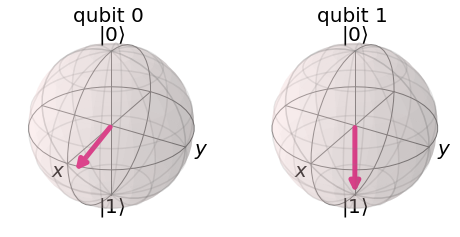

In [53]:
plot_bloch_multivector(states[2])

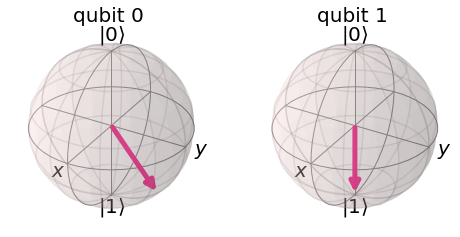

In [54]:
plot_bloch_multivector(states[3])

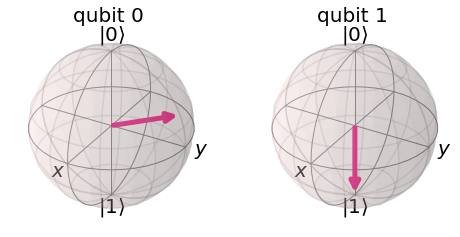

In [55]:
plot_bloch_multivector(states[4])

それぞれの位相で状態が変化し、Y-Z軸に沿って回転しているのがわかると思います。さて、このパラメーターリストを回路 `qc` に適用して、次の演習を行ってみましょう。

<a id="exercise2"></a>
<div class="alert alert-block alert-success">
    
<b> Exercise 2:</b> 
    
パラメーターをパラメーター化された回路リストにバインドし、個々の位相`individual_phases`を`Sampler`を使用して上で作成した`qc`回路にバインドします。 回答タイプは **[SamplerResult](https://qiskit.org/documentation/stubs/qiskit.primitives.SamplerResult.html)** です。
    
</div>

ここでは、再び `Sampler` を使って、これらの回路をすべて実行し、パラメーターをバインドします。

`Sampler` オブジェクトを作成する際には、seed用のパラメーターである `options` を追加してください。

`Sampler`の run メソッドには、以下のパラメーターがあります。

>`circuits` - 1つ以上の回路オブジェクト。 
>`parameter_values` - 回路にバインドされるパラメーター。

このExerciseにpassするために、以下のコードセルを完成させてください。

In [56]:
options = Options(simulator={"seed_simulator": 42},resilience_level=0) # Do not change values in simulator

In [57]:
with Session(service=service, backend=backend):    
    sampler = Sampler(options=options)
    job = sampler.run(circuits=[qc for _ in range(50)], parameter_values=individual_phases)
    result = job.result()

In [58]:
# Submit your answer using following code
from qc_grader.challenges.fall_2022 import grade_lab1_ex2

grade_lab1_ex2(result) # Expected result type: SamplerResult

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


上のコードセルは、パラメーター化された回路を受け取り、Runtimeサービスを使ってバックエンドで実行します。このルーチンは各パラメーターを定義された回路に結びつけ、その結果得られたすべての回路を実行し、集合的な結果を得ることができます。

それでは、得られた結果と理論的に推測される結果をプロットしてみましょう。これらの回路について、1つの状態となる確率の準分布を求めます。各回路は位相パラメーターとして異なるtheta値を持つことになります。

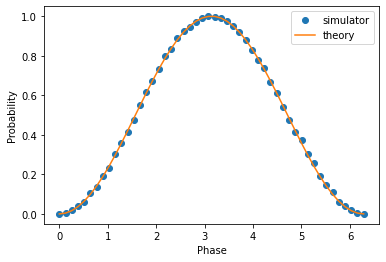

In [59]:
# The probablity of being in the 1 state for each of these values
prob_values = [dist.get(1, 0) for dist in result.quasi_dists]

plt.plot(phases, prob_values, 'o', label='simulator')
plt.plot(phases, np.sin(phases/2,)**2, label='theory')
plt.xlabel('Phase')
plt.ylabel('Probability')
plt.legend();

黄色い線が理論値で、青い点はバックエンドで実行したときの値です。ほぼ理論と一致していますが、`ibmq_qasm_simulator`固有のランダム性により、結果の分布のカーブには若干のずれが生じています。

ここまでは準確率分布を見てきましたが、期待値の評価という観点からも見てみましょう。

# Section 3.2: Estimatorの例

Estimatorは、量子演算子の期待値を計算し、受け取ったものを提供します。Estimatorは、「測定のない」回路である必要があります。なぜかというと、VQEのようなアルゴリズムを実行する場合、Estimatorはハミルトニアンを得るために単一量子ビットの回転をバインドするので、測定をすることができないからです。

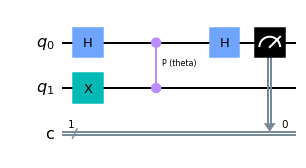

In [60]:
display(qc.draw())

現在の回路`qc`には測定があるので、`remove_final_measurements`でこれを削除します。

In [61]:
qc_no_meas = qc.remove_final_measurements(inplace=False)

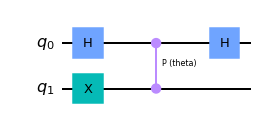

In [62]:
display(qc_no_meas.draw())

期待値を計算するために、回路に観測量を設定する必要があります。ここでは、'ZZ' 観測量を使います。観測値の長さは回路の量子ビットの数と同じであることに注意してください。

In [63]:
ZZ = SparsePauliOp.from_list([("ZZ", 1)])

期待値は以下の式で算出されます。

$$
\langle ZZ\rangle =\langle \psi | ZZ | \psi\rangle=\langle \psi|(|0\rangle\langle 0| -|1\rangle\langle 1|)\otimes(|0\rangle\langle 0| - |1\rangle\langle 1|) |\psi\rangle =|\langle 00|\psi\rangle|^2 - |\langle 01 | \psi\rangle|^2 - |\langle 10 | \psi\rangle|^2 + |\langle 11|\psi\rangle|^2
$$

上の式をよく見てから、次のセルを実行することを強くお勧めします。

In [64]:
options = Options(simulator={"seed_simulator": 42})

with Session(service=service, backend=backend):
    estimator = Estimator(options=options)
    job = estimator.run(circuits=[qc_no_meas]*len(phases), parameter_values=individual_phases, observables=[ZZ]*len(phases))

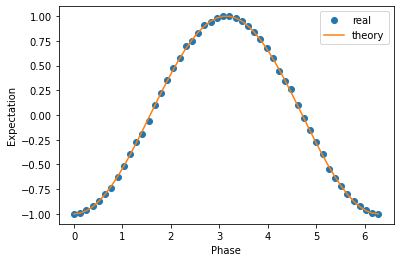

In [65]:
param_results = job.result()
exp_values = param_results.values

plt.plot(phases, exp_values, 'o', label='real')
plt.plot(phases, 2*np.sin(phases/2,)**2-1, label='theory')
plt.xlabel('Phase')
plt.ylabel('Expectation')
plt.legend();

### ハミルトニアンについて


推定量の面白い使い方の一つは、特に観測量に関するハミルトニアンを計算するのに使えることです。

ハミルトニアンは量子力学的な演算子であり運動エネルギーと位置エネルギーを含む系内の全エネルギー情報を持っています。
そのため、ハミルトニアンの計算が必要なのです。
そのエネルギー値を計算できれば、自然界におけるエネルギーや、機械学習におけるコストを計算することができます。
基底状態や励起状態を見つけることができるので
量子物理学、量子化学、量子機械学習と密接に関係しています。

ハミルトニアンを計算するためには、パラメーター化された回路が必要です。[**RealAmplitudes**](https://qiskit.org/documentation/stubs/qiskit.circuit.library.RealAmplitudes.html) を使えば、ランダムなパラメーター化された回路を簡単に作ることができます。以下にコード例を示します。

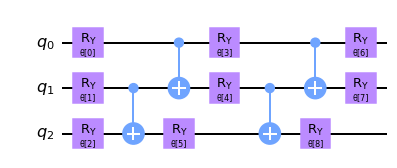

In [66]:
ansatz = RealAmplitudes(3, reps=2)  # create the circuit on 3 qubits
ansatz.decompose().draw("mpl")

この`ansatz`は3量子ビットの回路で、`reps` は2です。この場合、パラメータの総数は$3 \times (2+1) = 9$となります。

<a id="exercise3"></a>
<div class="alert alert-block alert-success">
    
<b> Exercise 3:</b> 
    
特定の観測値に関するカスタムハミルトニアンの期待値を計算する推定ルーチンを構築します。解答は、[**EstimatorResult**](https://qiskit.org/documentation/stubs/qiskit.primitives.EstimatorResult.html) である必要があります。
    
$ \langle \psi_1(\theta) \lvert H_1 \lvert \psi_1(\theta)\rangle$, $ \langle \psi_2(\theta) \lvert H_2 \lvert \psi_2(\theta)\rangle$, $ \langle \psi_3(\theta) \lvert H_3 \lvert \psi_3(\theta)\rangle$をEstimatorを使って計算します。回路は全て5量子ビットで構成されています。
    
1. [**RealAmplitudes**](https://qiskit.org/documentation/stubs/qiskit.circuit.library.RealAmplitudes.html)を使ってランダムな回路を作ります； $\psi_1(\theta) $はreps = 2 、 $ \psi_2(\theta) $はreps = 3、 $ \psi_3(\theta) $はreps = 4です。
2. [**SparsePauliOp**](https://qiskit.org/documentation/stubs/qiskit.quantum_info.SparsePauliOp.html)を使ってハミルトニアンを作ります。
    - $ H_1 = X_1Z_2 + 3Y_0Y_4 $
    - $ H_2 = 2X_3 $
    - $ H_3 = 3Y_2 + 5Z_1X_3 $
3. [**numpy.linspace**](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)を使って0から1までの theta の値を等間隔に並べたリストを作ります。なお、各回路の`reps`が異なるため、パラメーターの数が異なります。
4. セル内で定義された `options` を持つEstimatorを使って、各期待値を計算します。
    
    
</div>

In [67]:
# Make three random circuits using RealAmplitudes

n_qubit = 5
reps1 = 2
reps2 = 3
reps3 = 4

psi1 = RealAmplitudes(n_qubit, reps=reps1)
psi2 = RealAmplitudes(n_qubit, reps=reps2)
psi3 = RealAmplitudes(n_qubit, reps=reps3)


In [68]:
# Make hamiltonians using SparsePauliOp

H1 = SparsePauliOp.from_list([("IIZXI",1), ("YIIIY",3)])
H2 = SparsePauliOp.from_list([("IXIII",2)])
H3 = SparsePauliOp.from_list([("IIYII",3), ("IXIZI",5)])


In [69]:
# Make a list of evenly spaced values for theta between 0 and 1

theta1 = np.linspace(0, 1, n_qubit*(reps1+1))
theta2 = np.linspace(0, 1, n_qubit*(reps2+1))
theta3 = np.linspace(0, 1, n_qubit*(reps3+1))

print(theta1)

[0.         0.07142857 0.14285714 0.21428571 0.28571429 0.35714286
 0.42857143 0.5        0.57142857 0.64285714 0.71428571 0.78571429
 0.85714286 0.92857143 1.        ]


In [70]:
# Use the Estimator to calculate each expectation value

with Session(service=service, backend=backend):
    
    options = Options(simulator={"seed_simulator": 42},resilience_level=0) # Do not change values in simulator
    
    estimator = Estimator(options=options)
        
    # calculate [ <psi1(theta1)|H1|psi1(theta1)>,
    #             <psi2(theta2)|H2|psi2(theta2)>,
    #             <psi3(theta3)|H3|psi3(theta3)> ]
    # Note: Please keep the order
    qcs = [psi1, psi2, psi3]
    pvs = [theta1, theta2, theta3]
    obs = [H1, H2, H3]
    job = estimator.run(circuits=qcs, parameter_values=pvs, observables=obs)

    result = job.result()

In [71]:
print(result)

EstimatorResult(values=array([ 0.003 ,  1.749 , -1.0685]), metadata=[{'variance': 9.999775, 'shots': 4000}, {'variance': 0.9409989999999997, 'shots': 4000}, {'variance': 33.04502775, 'shots': 4000}])


In [72]:
# Submit your answer using following code
from qc_grader.challenges.fall_2022 import grade_lab1_ex3

grade_lab1_ex3(result) # Expected result type: EstimatorResult

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


# Part IV: エラー緩和の始まり

前述したように、Qiskit Runtimeサービスには、Error mitigationとError suppressionのルーチンが用意されており、得られる情報の品質を高めるために実装されています。

現在の量子コンピューターは**ノイズ**の影響を受けます。量子コンピューターにおけるノイズやデコヒーレンスの影響を軽減・改善するために、これらのノイズの影響を符号化レベルで完全に否定しようとするアプローチとして、通常受け入れられているのが誤り訂正です。しかし、この誤り訂正プロトコルは、効果的である一方で、誤り訂正符号の実装に量子的および古典的なリソースで膨大なオーバーヘッドを必要とするため、耐障害性のある計算システムを実現するためには非常に大きな負担となります。

このオーバーヘッドは、現在のNISQ時代のシステムでは、量子ビットの数、制御されたエラー率、追加の回路の深さや測定などの制限により、現実的には実現不可能なものです。そこで、現時点でできることは、膨大なリソースを用いてエラーを完全に除去するのではなく、より小さなオーバーヘッドでその影響を**軽減**することを目指すことです。このような技術は、エラー緩和やエラー抑制と呼ばれ、ハードウェアに起因するエラーを完全に除去するのではなく、減らすことに焦点を当てた一連の最新技術です。これらの概念の区別については、IBM Researchの[**ブログ記事**](https://research.ibm.com/blog/quantum-error-suppression-mitigation-correction) で分かりやすく解説されています。

Qiskit Runtimeサービスには、代表的でよく知られたエラー緩和とエラー抑制の戦略が、primitiveモデルに統合されてすでにサービスに組み込まれており、抽象化されたレイヤーを使って、有効化したり無効化したりすることができます。

これらのテクニックの最初の例として、Qiskit Runtimeのエラー緩和方法、M3をSamplerで使う例を紹介します。

# 4.1 Samplerでのエラー緩和

`Sampler`では、[**M3エラー軽減ルーチン**](https://arxiv.org/pdf/2108.12518.pdf) を利用して、より良い質の情報を得ることができます。一般的に、エラー緩和策は、`resilience_level`パラメーターを使用してオンにすることができ、戦略に応じていくつかの追加オプションがあります。

M3を有効にするには、オプションで`resilience_level=1`に設定し、M3を実行に適用します。それでは、そのデモを見てみましょう。

### M3

初期ノイズが最小である標準的な状況では、$N$量子ビットを超える測定誤差は古典的に処理でき、次を満たすことができます。

$$ \vec{p}_{noisy} = A\vec{p}_{ideal} $$

ここで、$\vec{p}_{noisy}$ は量子システムによって返されるノイズ確率のベクトル、$\vec{p}_{ideal}$ は測定エラーがない場合の確率、$A_{row ,col}$ は、$2^N \times 2^N$ の完全割り当て行列です。ここで、$A$ の各要素は、測定誤差プロセスによってビット文字列 $col$ がビット文字列 $row$ に変換される確率です。$A$ を計算するには $2^N$ 個の回路を実行する必要がありますが、多くの場合、複数の量子ビットのエラーは、多くても $\mathcal{O}(N)$ 個の較正回路で近似できます。 **[[1]](https://arxiv.org/pdf/2108.12518.pdf)**

M3は、スケーラブルな量子測定誤差軽減のためのパッケージで、割り当て行列やその逆行列を明示的に形成する必要がないため、行列不要の測定誤差軽減（matrix-free measurement mitigation, M3）ルーチンとなっています。

![truncation](https://qiskit.org/documentation/partners/mthree/_images/truncation.png)

M3は、補正されるノイズの多い入力ビット列によって定義される縮小部分空間において動作します。ビット列の数はマルチ量子ビットヒルベルト空間の次元よりもはるかに小さいため、結果として得られる連立方程式は名目上、より簡単に解くことができます。

$$ (\tilde{A})^{-1}\tilde{A}\vec{p}_{ideal} = (\tilde{A})^{-1}\vec{p}_{noisy} $$

この線形方程式は、LU分解を用いれば、わずかな計算資源で解くことができる場合が多いです。しかし、一意な双列の数が多く、また、メモリーに非常に厳しい制約がある場合、この問題は、一般化最小残差法（GMRES）や双重勾配安定化法（BiCGSTAB）など、事前条件を付けた反復線形解法を使って行列なしで解くことができます。[**[2]**](https://qiskit.org/documentation/partners/mthree/index.html)

## ノイズありシミュレーターでの実行

ここでは、ノイズありシミュレーターを使用して、このエラー緩和手法がどのように機能するかを見ていきます。シミュレーターでノイズのあるシナリオをシミュレートするために、`ibmq_qasm_simulator` にノイズモデルを渡します。`fake_provider` から `FakeBackend` を用いてノイズモデルを作成し、`simulator` オプションパラメーターとして渡します。

Fake backendsは、システムスナップショットを用いて、IBM Quantum systemsの動作を模倣するように構築されています。スナップショットには、量子システムのカップリングマップ、基底ゲート、量子ビットの特性（T1、T2、エラーレートなど）など、量子システムのノイズシミュレーションに有用な情報が含まれています。[**[3]**](https://qiskit.org/documentation/apidoc/providers_fake_provider.html)

実行時のオプションを表現するために、`Options` クラスのインスタンスを定義し、各実行時のデフォルトを定義するための関連パラメーターを設定します。

ここでは、2つの `Options` のセットを定義します。noise_model を指定した `options` は、エラー緩和を行わない通常のrunを表し、 `options_with_em` と `resilience_level` オプションを `1` に設定したものは、エラー緩和を有効にしたrunを表します。作成後、`Sampler` オブジェクトのインスタンスを作成する際に、このように追加することができます。

 `Options` のインスタンスの作成方法は以下を参照してください。

In [15]:
from qiskit.providers.fake_provider import FakeManila
from qiskit_aer.noise import NoiseModel

# Import FakeBackend
fake_backend = FakeManila()
noise_model = NoiseModel.from_backend(fake_backend)

# Set options to include noise_model
options = Options(
    simulator={
        "noise_model": noise_model,
        "seed_simulator": 42,
    },
    resilience_level=0
)

# Set options to include noise_model and resilience_level
options_with_em = Options(
    simulator={
        "noise_model": noise_model,
        "seed_simulator": 42,
    },  
    resilience_level=1
)

Samplerでは、resilience levelを1にするとM3が有効になります。この技術がどのくらい効果があるのか、以下のコードを実行して確認してみましょう。

In [125]:
with Session(service=service, backend=backend):
    sampler = Sampler(options=options)
    job = sampler.run(circuits=[qc]*len(phases), parameter_values=individual_phases)
    param_results = job.result()
    prob_values = [1-dist[0] for dist in param_results.quasi_dists]
    
    sampler = Sampler(options=options_with_em)
    job = sampler.run(circuits=[qc]*len(phases), parameter_values=individual_phases)
    param_results = job.result()
    prob_values_with_em = [1-dist[0] for dist in param_results.quasi_dists]

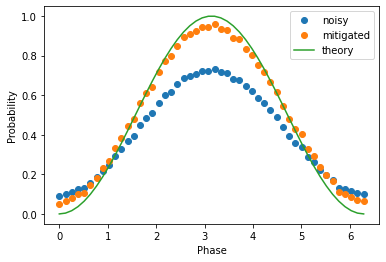

In [126]:
plt.plot(phases, prob_values, 'o', label='noisy')
plt.plot(phases, prob_values_with_em, 'o', label='mitigated')
plt.plot(phases, np.sin(phases/2,)**2, label='theory')
plt.xlabel('Phase')
plt.ylabel('Probability')
plt.legend();

### DD

量子情報の寿命を延ばすために、ダイナミックデカップリング(DD)が利用されます。

量子ビットがアイドル状態になると、デコヒーレンスにより周囲に情報が漏れてノイズとなります。このアイドル状態を防ぐために、いわゆるデカップリング手法で効果的に環境を切り離します。アイドル時間（つまり遅延命令が含まれる時間）をスキャンし、その場所にDD列のゲートを挿入します。このゲートはIDに相当するため、回路の論理的な動作はありませんが、アイドル時間における非干渉性を緩和する効果があります。ただし、パルスの長さが有限であり、完全な回転を実現できないため、適切なDDシーケンスを使用しないと、この手法では状況が改善されない場合があります。量子ビットのコヒーレンスを維持し、量子ビットを破壊しない最適なデカップリングシーケンスを持つことが重要です。

![DD circuit](https://qiskit.org/documentation/_images/qiskit.transpiler.passes.DynamicalDecoupling_1_0.png)

上の回路では、複数のXゲートがあり、アイドル状態であることが分かります。Xゲートを2回かけると、IDゲートと同じになるので、論理的には変化はありません。

DDの詳細は[**こちら**](https://qiskit.org/documentation/stubs/qiskit.transpiler.passes.DynamicalDecoupling.html) をご覧ください。このDD機能は、**Qiskit Runtimeではデフォルトで有効になっています。**

# 4.2 Estimatorでのエラー緩和

Samplerは、現在、エラー緩和策としてM3を取り入れていますが、Estimatorでは、複数のエラー緩和策を有効にすることができます。現在、**トワイル読み出しエラー消去法(Twirled Readout Error eXtinction,T-REX)**、**デジタル・ゼロノイズ外装(Digital Zero-noise Extrapolation, ZNE)** 、**確率的エラーキャンセル(Probabilistic Error Cancellation, PEC)** を`Options`パラメーターの`resilience_level`として有効にすることが可能です。このnotebookでは、T-REXをデモとして取り上げ、他のresilience levelは、任意(オプショナル)の章で説明します。

### T-Rex

T-REXは **Twirled Readout Error eXtinction** の略で、ゲートを"twirling"(トワリング、何回もくるくると作用)させる実装法です。ノイズを完全な回路実装の上に乗っている余分な確率的ゲート集合と見なすと、回路を実行するたびに、このノイズゲートの集合と「トワリング・セット」と呼ばれるゲートの集合からランダムに選ばれたゲートを結合させるという意味でトワリングと呼ぶことができます。このゲート集合をパウリ演算子の集合に選ぶと、「パウリ・トワリング」と呼ばれ、これは最もよく使われるトワリング・テクニックの1つです。


パウリ・トワリングはランダム化コンパイルの一種で、エンタングルゲートの前後にパウリゲート（I、X、Y、Z）のペアを挿入し、全体のユニタリーは同じままで、実装の仕方が異なるようにするものです。これにより、コヒーレントな誤差を確率的な誤差に変換し、十分な平均化によって除去することができます。これは、平均化の効果を得るために何度も行われます。注意：現在、すべての誤差を打ち消すのに十分な基底セットを使用しない場合があります。 **[[4]](https://github.com/qiskit-research/qiskit-research/blob/main/docs/getting_started.ipynb)** 

オプションで `resilience_level=1` を設定すると、`Estimator` 上で T-REX を有効にすることができます。

Estimatorにおける誤差軽減をオプションの一つとして、Digital ZNEを検討することもできます。

### デジタルZNE（ゼロノイズ外挿）

デジタルZNE（Zero Noise Extrapolation）は、ノイズの多い量子コンピューターの誤差を、量子リソースを追加することなく軽減するための一般的な手法です。量子コンピューターのプログラムを変更し、異なるノイズレベルで計算を実行します。計算結果は、ノイズのない状態での推定値に外挿されます。

デジタルZNEでは、適切な値を求めるために、まず上記で説明したようにノイズをスケーリングします。スケーリングの方法には、アナログとデジタルの2種類があります。それぞれの方法の詳しい説明は下記で確認できます。どちらの方式が良いかは、まだ研究課題です。ここでのデジタルな方法は、物理的な量子パルスには作用させない手法です。

- パルス波の引き伸ばし（アナログ）： 同じパルス波を物理的により大きな時間に沿って引き伸ばしたものを回路に適用します。原理的には同じ回路だが、実効ノイズが大きくなります。[**[5]**](https://arxiv.org/pdf/1612.02058.pdf)
- ローカル・フォールディング（デジタル）：入力回路をより多くのゲートでコンパイルします。各ゲート$G$を$G$, $G^\dagger$, $G$に置き換えます。シミュレーターでは回路に何もしませんが、実機を使用すると、ノイズが増加していくのがわかります。
- グローバル・フォールディング（デジタル）：ローカル・フォールディングと同じ操作ですが、このトリックを回路全体に適用します。

Qiskit runtimeには現在、デジタルZNEの実装があり、`resilience level`を`2`に設定することで有効にすることができます。

In [127]:
# Set options to activate T-Rex Error Mitigation module
options_with_em = Options(
    simulator={
        "noise_model": noise_model,
        "seed_simulator": 42,
    },  
    resilience_level=1 # You may change the value here. resilience_level = 1 will activate TREX
)

In [128]:
with Session(service=service, backend=backend):    
    estimator = Estimator(options=options)
    job = estimator.run(circuits=[qc_no_meas]*len(phases), parameter_values=individual_phases, observables=[ZZ]*len(phases))
    param_results = job.result()
    exp_values = param_results.values
    
    estimator = Estimator(options=options_with_em)
    job = estimator.run(circuits=[qc_no_meas]*len(phases), parameter_values=individual_phases, observables=[ZZ]*len(phases))
    param_results = job.result()
    exp_values_with_em = param_results.values

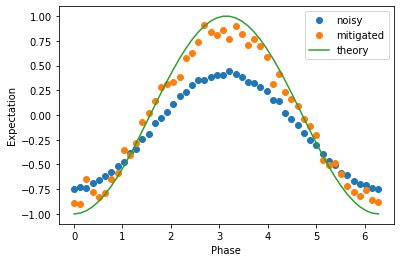

In [129]:
plt.plot(phases, exp_values, 'o', label='noisy')
plt.plot(phases, exp_values_with_em, 'o', label='mitigated')
plt.plot(phases, 2*np.sin(phases/2,)**2-1, label='theory')
plt.xlabel('Phase')
plt.ylabel('Expectation')
plt.legend();

T-REXを選択した場合、実行するたびに結果が変わることがあることに気づくと思います。これは、Twirlingに選択されたゲートセットが毎回異なるためで、これが結果に見られるランダムな特性の一因となっています。

### 任意(オプショナル): より高いresilience level（ベータ版）

Qiskit runtimeのresilience levelは、エラーに対してどの程度の回復力を構築するかを指定するための指標です。levelが高いほど、より正確な結果を生成しますが、処理時間が長くなるデメリットもあります。Qiskit runtimeでより高いレベルの回復力を有効にすることもできますが、 **この機能は現在ベータ版** であり、期待通りの結果が得られない可能性があることに留意してください！

- `resilience_level=2` は **ゼロノイズ外装(Digital Zero-noise Extrapolation, ZNE)** を利用し、異なるノイズファクターに対する測定の期待値を計算し（増幅ステージ）、次に測定した期待値を使ってゼロノイズ限界での理想的な期待値を推測します（外挿ステージ）。この方法は期待値の誤差を減らす傾向がありますが、バイアスのない結果が得られることは保証されていません。
- `resilience_level=3` では、 **PEC（Probabilistic Error Cancellation、確率的エラーキャンセル）方式** を有効にします。この方法は、相関のあるノイズを捉えることができるスパースノイズモデルを学習し、反転させることでエラーを軽減するものです。PECは、学習されたノイズモデルによって緩和時に実際のノイズモデルを忠実に表す限り、バイアスのない期待値の推定値を返します。

PECのQiskit Runtime primitiveの実装では、特に2量子ビットゲートにおける自己逆行列のノイズを扱うため、まず各入力回路を同時1量子ビットゲートと同時2量子ビットゲートの交互配列に層別します。そして、各2量子ビットゲート層に関連するノイズモデルを学習します。より大きな問題に挑戦する前に、PECのサンプリングオーバーヘッドのスケーリングに関する感触を得るために、 **短い深さの回路から始めることをお勧めします。**

これらのオプションの詳細については、こちらの **[リリースノート](https://github.com/Qiskit/qiskit-ibm-runtime/blob/ab7486d6837652d54cb60b83cfaa9165f5d0484c/docs/how_to/error-mitigation.rst#advanced-resilience-options)** で設定を確認してください。 **[[6]](https://github.com/Qiskit/qiskit-ibm-runtime/blob/ab7486d6837652d54cb60b83cfaa9165f5d0484c/docs/how_to/error-mitigation.rst#advanced-resilience-options)**

<div class="alert alert-block alert-info">

<b>任意(オプショナル): 実機のバックエンドでの実行</b>    

上記のコードを **実機の量子バックエンド** でテストして、QPUで実行した場合に結果がどのように変わるかを確認してみてください。あなたにこのChallenge用の`hub`、`group`、 `project` が割り当てられます。以下のセルを自由に設定し、実験してください！
    
</div> 

# 4.3 (任意) 実機での誤差緩和

いよいよ **本物のバックエンド** を設定する時が来ました！設定するために、まずこのChallengeのためのproviderの設定をしましょう。これはGrading対象外であり、完全に任意の問題です。実際のバックエンドでエラーの緩和や軽減の戦略を考えるのは楽しいことです！


In [130]:
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main') # Change according to the email provided

ibmqfactory.load_account:WARNING:2022-11-16 10:20:38,288: Credentials are already in use. The existing account in the session will be replaced.


In [131]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

これらのバックエンドの中で一番速く実行できるように、一番混んでいない実バックエンドを選びます。ご希望であれば、特定のバックエンドを指定することも可能です！

In [57]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: not x.configuration().simulator))

まず`Sampler`で本物のバックエンドを使います：

In [58]:
options = Options(resilience_level=0) 
options_with_em = Options(resilience_level=1) 

In [59]:
with Session(service=service, backend=backend.name()):
    sampler = Sampler(options=options)
    job = sampler.run(circuits=[qc]*len(phases), parameter_values=individual_phases)
    param_results = job.result()
    prob_values = [1-dist[0] for dist in param_results.quasi_dists]
    
    sampler = Sampler(options=options_with_em)
    job = sampler.run(circuits=[qc]*len(phases), parameter_values=individual_phases)
    param_results = job.result()
    prob_values_with_em = [1-dist[0] for dist in param_results.quasi_dists]

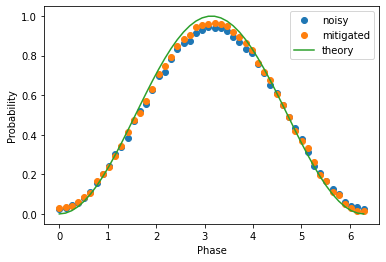

In [60]:
plt.plot(phases, prob_values, 'o', label='noisy')
plt.plot(phases, prob_values_with_em, 'o', label='mitigated')
plt.plot(phases, np.sin(phases/2,)**2, label='theory')
plt.xlabel('Phase')
plt.ylabel('Probability')
plt.legend()

`Estimator`で本物のバックエンドを使います：

In [61]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: not x.configuration().simulator))

In [ ]:
options_with_em = Options(resilience_level=1) # Change to see difference

In [ ]:
with Session(service=service, backend=backend.name()):    
    estimator = Estimator(options=options)
    job = estimator.run(circuits=[qc_no_meas]*len(phases), parameter_values=individual_phases, observables=[ZZ]*len(phases))
    param_results = job.result()
    exp_values = param_results.values
    
    estimator = Estimator(options=options_with_em)
    job = estimator.run(circuits=[qc_no_meas]*len(phases), parameter_values=individual_phases, observables=[ZZ]*len(phases))
    param_results = job.result()
    exp_values_with_em = param_results.values

In [ ]:
plt.plot(phases, exp_values, 'o', label='noisy')
plt.plot(phases, exp_values_with_em, 'o', label='mitigated')
plt.plot(phases, 2*np.sin(phases/2,)**2-1, label='theory')
plt.xlabel('Phase')
plt.ylabel('Expectation')
plt.legend()

次は、 **クイックなトリビア問題** です！

<a id="exercise4"></a>

<div class="alert alert-block alert-success">
    
<b> Exercise 4:</b> 
    
**次の中から正しいものを選んでください。** 複数回答可です。

1. 誤り訂正は誤り軽減と同じである。
2. DDのためにX-gateを適用する場合、2回だけ適用することが可能である。
3. DDには最適なデカップリング順序が重要である。
4. M3 は量子測定誤差緩和のためのものである。
5. M3を使用する場合，Resilience levelを2に設定する必要がある。
6. T-REXはコヒーレントな誤差を確率的な誤差に変化させる。
7. ZNEは誤り訂正技術であり、耐故障性QCに使用される。
8. ZNEはノイズのスケールファクターを増幅し、ノイズがないときの測定値を推定する。
9. グローバル・フォールディングは、量子パルスを物理的に引き伸ばすアナログ的な方法である。
10. ZNEを用いると、すべての誤差を軽減することができる。

答えは、**整数のリスト** である必要があります。もし、すべての文が間違いだと思うなら、空のリストを渡してください。


</div>

In [132]:
answer = [3, 4, 6, 8] # build your code here

In [133]:
# Submit your answer using following code
from qc_grader.challenges.fall_2022 import grade_lab1_ex4

grade_lab1_ex4(answer) # Expected result type: List

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


# Part V: 2つのPrimitivesの例 - メッセージを解読する！

今回のストーリーに沿って、上記の学習を活かして、通信で受け取った**奇妙なメッセージを解読**し、この謎の真相に迫ってみましょう。最終的に**どの程度ノイズが多いか**によって、メッセージがはっきり見えるかどうかが決まります！

<a id="exercise5"></a>
<div class="alert alert-block alert-success">
    
<b> Exercise 5:</b> 
    
ノイズのある送信にエラー緩和を適用して、隠されたメッセージを解明します!
    
解答は、[**SamplerResult**](https://qiskit.org/documentation/stubs/qiskit.primitives.SamplerResult.html) オブジェクトと **4つの[EstimatorResult](https://qiskit.org/documentation/stubs/qiskit.primitives.EstimatorResult.html)オブジェクトのリスト** を含む**リスト**である必要があります。
    
1. SamplerResultは、隠しビット列"11111"の**ベルンシュタイン・ヴァジラニ**回路を作って実行させます。以前に作ったルーチンを使うことができます。
    
2. EstimatorResultは、**CHSH不等式**の破れを証明する$S_1$ の回路を作ります。
    
</div>

## CHSH不等式

CHSH不等式は、著者であるClauser, Horne, Shimony, Holtの名前をとって名付けられたもので、ベルの不等式の実験的証明に用いられています。（Clauserは2022年のノーベル物理学賞受賞者の一人です！）この定理は、量子力学におけるエンタングルメントの結果を、局所的な隠れた変数理論では説明できないことを主張するものです。

この実験では、エンタングル・ぺアを作り、それぞれの量子ビットを2つの異なる基底で測定します。最初の量子ビットの基底を$A$と$a$、2番目の量子ビットの基底を$B$と$b$とラベル付けすることにします。これにより、CHSH量$S_1$と$S_2$を以下のように計算することができます。

$$S_1 = A(B-b) + a(B+b)$$

各観測量は$+1$か$-1$のどちらかです。明らかに、項$B\pm b$のうち1つは$0$でなければならず、もう1つは$\pm 2$でなければなりません。 よって、$S_1 = \pm 2$となります。$S_1$ の平均値は、不等式を満たす必要があります。
    
$$|\langle S_1 \rangle| = |\langle AB \rangle - \langle Ab \rangle + \langle aB \rangle + \langle ab \rangle| \leq 2$$

同様に、$S_2$とその不等式は以下のように定義されます。

$$S_2 = A(B+b) - a(B-b)$$
    
$$|\langle S_2 \rangle| = |\langle AB \rangle + \langle Ab \rangle - \langle aB \rangle + \langle ab \rangle| \leq 2$$
    
しかし、CHSH量の期待値を計算すると、 $|\langle S_1 \rangle| > 2$ または $|\langle S_2 \rangle| > 2$となり、CHSHの不等式を破っていることが分かります。CHSH不等式の詳細は、Qiskitテキストブックの **[こちらの章](https://ja.learn.qiskit.org/course/ch-demos/local-reality-and-the-chsh-inequality)** で確認できます!

###  `estimator_result`のタスク

CHSHの不等式の破れを証明するために、上の回路S1を構築してください。回路は、HゲートとCNOTゲートのベル回路と、最初の量子ビットにパラメーターthetaのY回転ゲートで作られます。下図でその様子を確認することができます。

リスト `estimator_result` には、それぞれの観測値 $Z_{0}Z_{1}$、$X_{0}Z_{1}$、$Z_{0}X_{1}$、$X_{0}X_{1}$ が別々に渡された **4 つの異なるジョブ結果** が含まれます。以下に定義する位相を使用し、ルーチンを完成させ、Exerciseを完成させましょう。

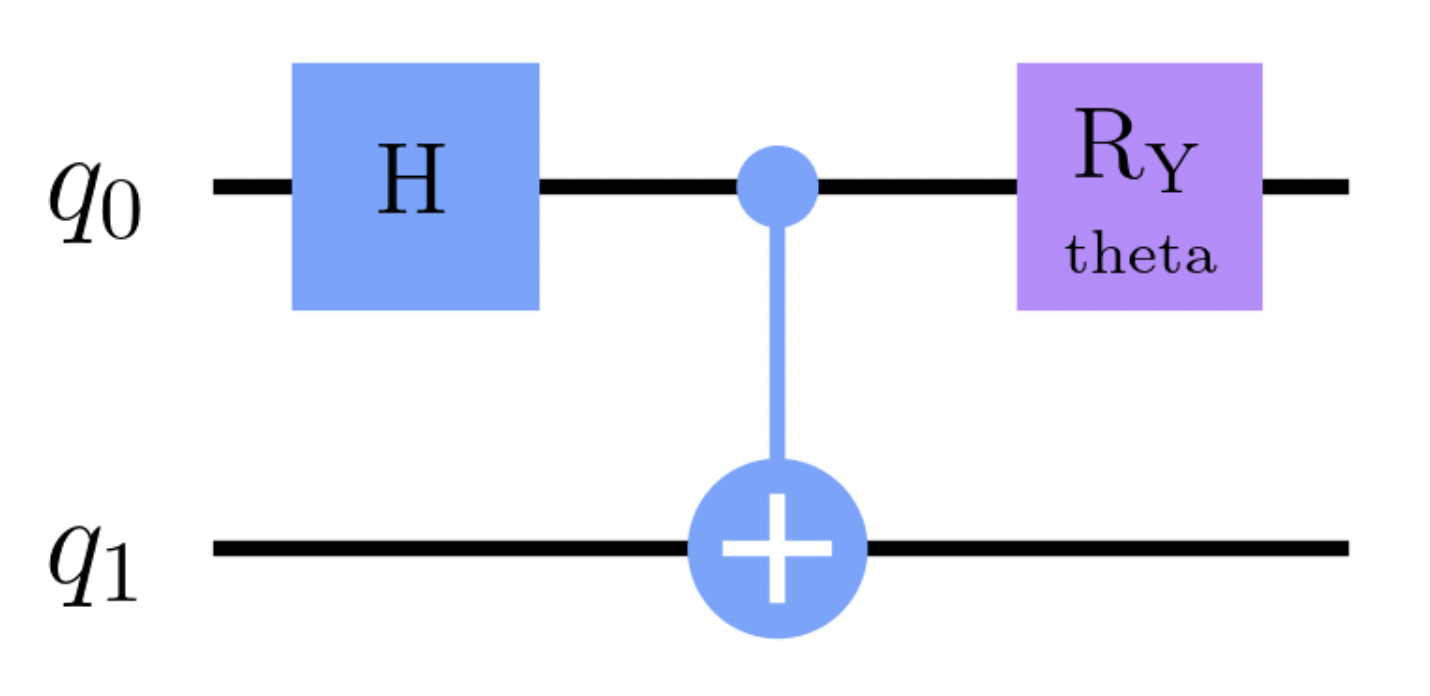

In [95]:
backend = service.backends(simulator=True)[0]
print(backend)

<IBMBackend('ibmq_qasm_simulator')>


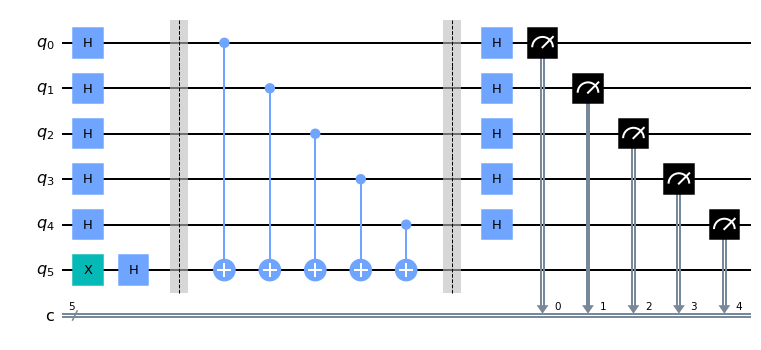

In [99]:
# build your code here
sampler_circuit = bernstein_vazirani("11111")

sampler_circuit.draw()

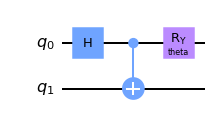

In [100]:
estimator_circuit = QuantumCircuit(2)

#
#
# build your code here
#
#
estimator_circuit.h(0)
estimator_circuit.cx(0,1)
estimator_circuit.ry(Parameter("theta"), 0)

estimator_circuit.draw()

In [101]:
# parameters for estimator_circuit

number_of_phases = 10
phases = np.linspace(0, 2*np.pi, number_of_phases)
individual_phases = [[ph] for ph in phases]

# observables for estimator_circuit

Z0Z1 = SparsePauliOp.from_list([("ZZ",1)])
X0Z1 = SparsePauliOp.from_list([("ZX",1)])
Z0X1 = SparsePauliOp.from_list([("XZ",1)])
X0X1 = SparsePauliOp.from_list([("XX",1)])

ops = [Z0Z1, X0Z1, Z0X1, X0X1] # DO NOT CHANGE THE ORDER

In [103]:
# Import FakeBackend
fake_backend = FakeManila()
noise_model = NoiseModel.from_backend(fake_backend)

options_with_em = Options(
    simulator={ # Do not change values in simulator
        "noise_model": noise_model,
        "seed_simulator": 42,
    },
    # build your code here. Activate TREX for Estimator and M3 for sampler.
    resilience_level=1
)

In [104]:
with Session(service=service, backend=backend):
    
    sampler = Sampler(options=options_with_em)
    sampler_result = sampler.run(circuits=sampler_circuit).result()
    
    estimator = Estimator(options=options_with_em)
    estimator_result = []
    for op in ops:
        job = estimator.run(circuits=[estimator_circuit]*number_of_phases, parameter_values=individual_phases, observables=[op]*number_of_phases)
        result = job.result()
        estimator_result.append(result)
    

In [105]:
result = [sampler_result, estimator_result]

In [106]:
# Submit your answer using following code
from qc_grader.challenges.fall_2022 import grade_lab1_ex5

grade_lab1_ex5(result) # Expected result type: List[SamplerResult, [EstimatorResult, EstimatorResult, EstimatorResult, EstimatorResult]]

Submitting your answer. Please wait...

Congratulations 🎉! Your answer is correct.


HTML(value='<img src="data:image/jpg;base64,/9j/4AAQSkZJRgABAQEAZABkAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw…

## 追加の教材

Estimatorの結果が正しいかどうか、グラフで確認することができます。

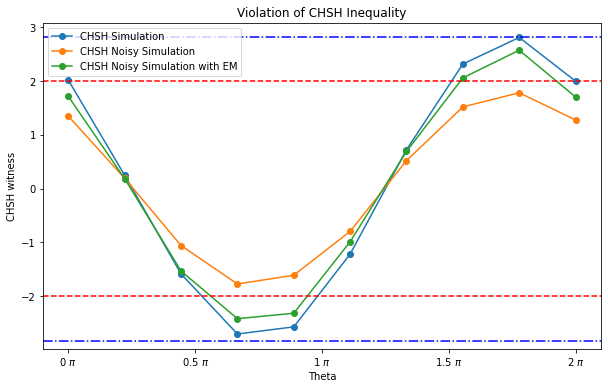

In [107]:
chsh_est_sim_val = [2.019, 0.25, -1.5855, -2.702, -2.57, -1.2165, 0.7235, 2.318, 2.812, 1.999]
chsh_est_noisy_val = [1.3495, 0.1935, -1.0575, -1.772, -1.61, -0.7935, 0.5215, 1.521, 1.784, 1.277]
chsh_est_em_val = estimator_result[0].values - estimator_result[1].values + estimator_result[2].values + estimator_result[3].values

fig, ax = plt.subplots(figsize=(10, 6))
# results from a simulator
ax.plot(phases/np.pi, chsh_est_sim_val, 'o-', label='CHSH Simulation')
ax.plot(phases/np.pi, chsh_est_noisy_val, 'o-', label='CHSH Noisy Simulation')
ax.plot(phases/np.pi, chsh_est_em_val, 'o-', label='CHSH Noisy Simulation with EM')
# classical bound +-2
ax.axhline(y=2, color='r', linestyle='--')
ax.axhline(y=-2, color='r', linestyle='--')
# quantum bound, +-2√2
ax.axhline(y=np.sqrt(2)*2, color='b', linestyle='-.')
ax.axhline(y=-np.sqrt(2)*2, color='b', linestyle='-.')
# set x tick labels to the unit of pi
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
# set title, labels, and legend
plt.title('Violation of CHSH Inequality')
plt.xlabel('Theta')
plt.ylabel('CHSH witness')
plt.legend()

<a id="exercise6"></a>

<div class="alert alert-block alert-success">
    
<b> Exercise 6:</b> 
    
隠されたメッセージが何かわかりましたか？以下で答えを確認してみましょう！    
</div>

In [108]:
message = "Captain's Log" # build your code here

In [109]:
# Submit your answer using following code
from qc_grader.challenges.fall_2022 import grade_lab1_ex6

grade_lab1_ex6(message) # Expected result type: str

Submitting your answer. Please wait...

Congratulations 🎉! Your answer is correct.
You successfully trigger the decoding sequence.

The author and timestamp are unscrambled first, and you discover the message was sent from...you.

From hundreds of years in the future.

The message is one of your own logs, a log you haven't recorded...yet?

Listen to the unscrambled Captain's Log here: https://www.youtube.com/watch?v=tBEcjZn56_E
        


# 参考文献
- [1] **[Scalable mitigation of measurement errors on quantum computers - Paul D. Nation,∗ Hwajung Kang, Neereja Sundaresan, and Jay M. Gambetta](https://arxiv.org/pdf/2108.12518.pdf)**
- [2] **[Documentation: mthree (1.1.0)](https://qiskit.org/documentation/partners/mthree/index.html)**
- [3] **[Fake Provider (qiskit.providers.fake_provider - Qiskit Documentation](https://qiskit.org/documentation/apidoc/providers_fake_provider.html)**
- [4] **[Getting Started - Qiskit Research](https://github.com/qiskit-research/qiskit-research/blob/main/docs/getting_started.ipynb)**
- [5] **[Error mitigation for short-depth quantum circuits - Kristan Temme, Sergey Bravyi and Jay M. Gambetta](https://arxiv.org/pdf/1612.02058.pdf)**
- [6] **[Configure error mitigation - release notes](https://github.com/Qiskit/qiskit-ibm-runtime/blob/main/docs/how_to/error-mitigation.rst)**

# 補足情報

<b>Created by:</b> Dayeong Kang, Yuri Kobayashi, Vishal Bajpe, Kifumi Numata

<b>Advisor:</b> Ikko Hanamura

<b>Creative assets by:</b> Radha Pyari Sandhir

<b>Translated and adapted by:</b> Kifumi Numata, Yuri Kobayashi

Version: 1.0

In [ ]:
from qiskit.tools.jupyter import *
%qiskit_version_table